# 2D Audio Feature Extraction & Visualization Demo

How to extract and visualize 2D audio features (MFCC, Chroma, Mel-Spectrogram, GFCC) using the AFX. (Using ESC_50_dataset as example).

In [1]:
import os

from AFX.io.io import load_audio
from AFX.utils.config_loader import load_config
from AFX.extract_all import extract_all_features
from AFX.utils.visualization import plot_mfcc, plot_spectrogram

import pandas as pd

In [2]:
DATASET_PATH = os.getenv('ESC_50_dataset')

In [3]:
# Load paths
audio_path = DATASET_PATH
config_full_path = os.path.join(os.path.dirname(os.getcwd()), 'AFX', 'config.json')
metadata_path = os.path.join(audio_path, 'meta', 'esc50.csv')

# Load one sample from the dataset
# Note: The dataset should be downloaded and the path set in the environment variable ESC_50_dataset
metadata = pd.read_csv(metadata_path) 
sample = metadata.sample(1).iloc[0]
audio_file = os.path.join(audio_path, 'audio', sample['filename'])

# Load configuration and audio
config = load_config(config_full_path)
signal, sr = load_audio(audio_file, sr=config['sample_rate'])

In [4]:
# Extract features with original shapes for visualization
config_with_shape = config.copy()
config_with_shape['preserve_shape'] = True
features = extract_all_features(signal, sr, config_with_shape)

print(f"Loaded audio: {audio_file}, Sample rate: {sr}")

Loaded audio: D:\datasets\ESC-50-master\audio\1-12654-A-15.wav, Sample rate: 22050


In [5]:
features.keys()  # Print all extracted features keys

dict_keys(['zcr', 'variance', 'rms_energy', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'spectral_skewness', 'spectral_slope', 'melspectrogram', 'mfcc', 'mfcc_delta', 'chroma_cqt', 'pitch', 'thd', 'hnr', 'gfcc'])

## Visualize MFCCs

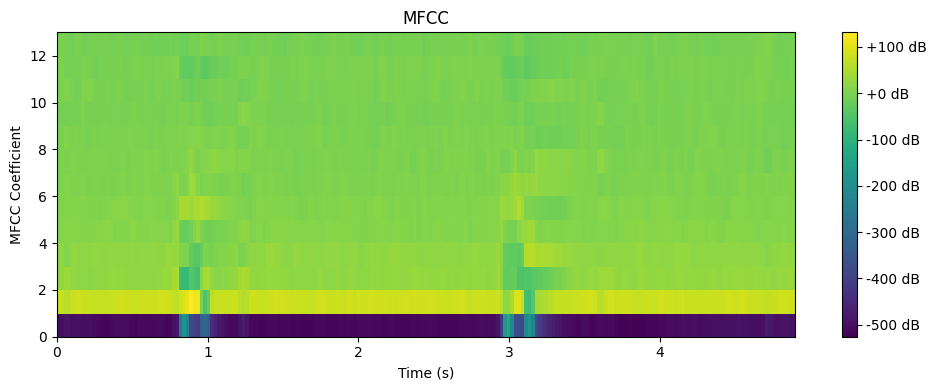

In [ ]:
mfcc = features['mfcc']
plot_mfcc(features['mfcc'], sr)

## Visualize Chroma (CQT)
Chroma features represent the intensity of each pitch class.

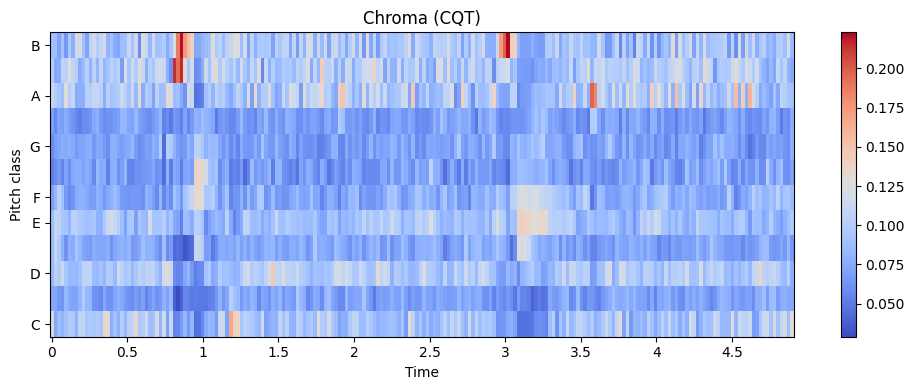

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

chroma_cqt = features['chroma_cqt']

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_cqt, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
plt.colorbar()
plt.title('Chroma (CQT)')
plt.tight_layout()
plt.show()

## Visualize Mel-Spectrogram
The Mel-Spectrogram is a 2D representation of the signal's energy in Mel frequency bands over time.

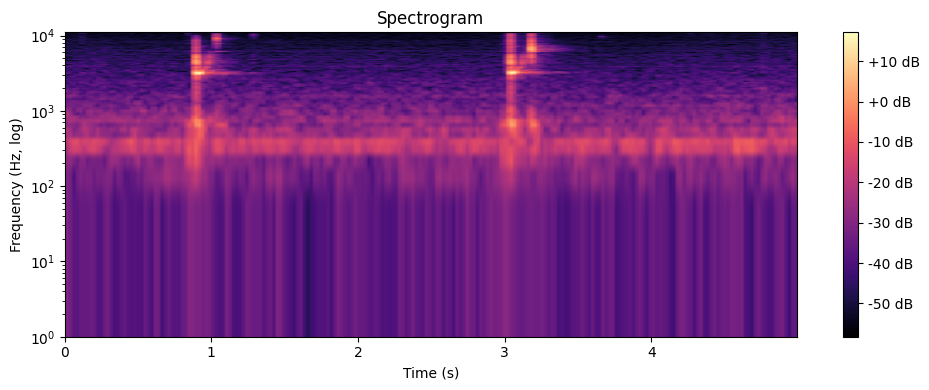

In [ ]:
melspectrogram = features['melspectrogram']
plot_spectrogram(melspectrogram, sr)

## Visualize GFCC
Gammatone Frequency Cepstral Coefﬁcients (GFCC).

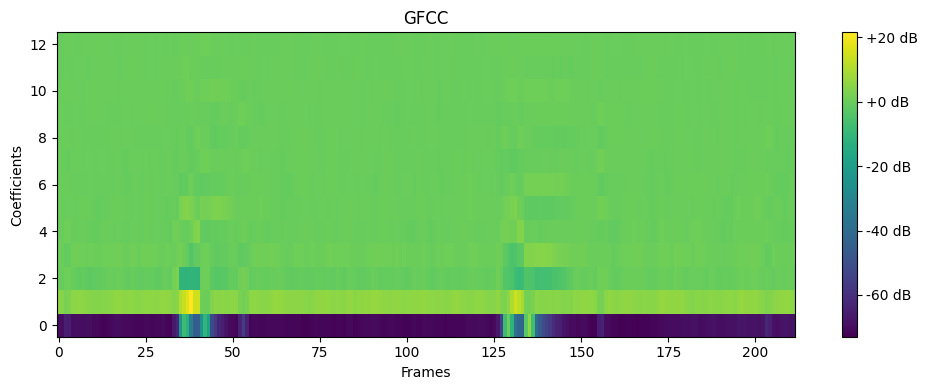

In [ ]:
gfcc = features['gfcc']
if gfcc.ndim == 3:
    gfcc_vis = gfcc.mean(axis=1)
else:
    gfcc_vis = gfcc
plt.figure(figsize=(10, 4))
plt.imshow(gfcc_vis, aspect='auto', origin='lower', cmap='viridis')
plt.title('GFCC')
plt.ylabel('Coefficients')
plt.xlabel('Frames')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()